# Assignment 1
Submitted by : Tan Siew Ling p7401864

## Housing
- For this problem, use only 1 target output variable **price**
- Prepare the data and perform necessary feature engineering
- Create **_at least two models_** 
- Evaluate the models and pick the best candidate
- Form some conclusions

# ***Prediction task : To predict house price of houses in King County, USA***

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


# Target Output Variable = House price

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import sklearn
import numpy as np
import pandas as pd
import matplotlib
import platform
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.22.2.post1
Numpy version=1.19.5
Pandas version=1.1.5
Matplotlib version=3.2.2
Seaborn version=0.11.1
Python version=3.7.10


# Data Importing¶

In [16]:
kchousedf = pd.read_csv("/content/drive/MyDrive/sp/sem2_apml/assignments/assignment1/kc_house_data.csv")
kchousedf.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


### **There are no missing value in the dataset**

In [17]:
kchousedf.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploratory Data Analysis

In [11]:
kchousedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

All values numeric except for the date

In [6]:
kchousedf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### **Correlation between the different features**

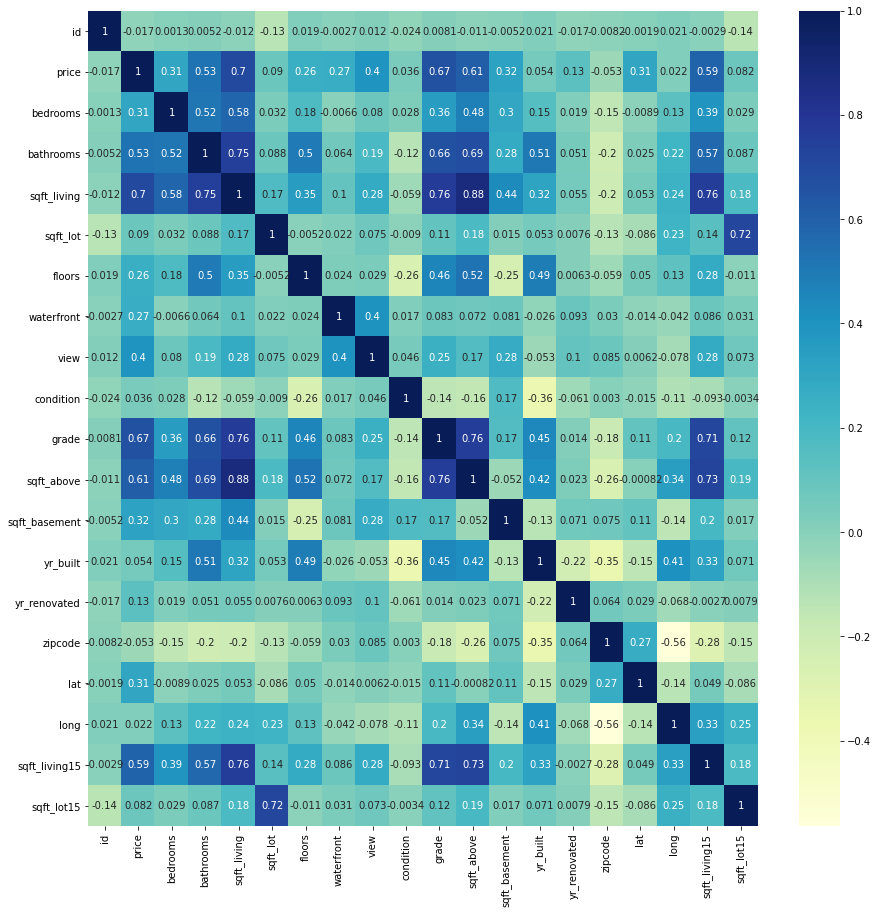

In [7]:
plt.subplots(figsize=(15,15))
corr = kchousedf.corr()
sns.heatmap(corr, cmap="YlGnBu",annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# **List of Features selected**
• How do you represent your data as features?


> (a) Drop columns not selected as features 


#  Data Preparation

Most of the data is clean but we need to drop some input columns that
are related to each other (multi-colinearity) for e.g.  
* sqft_living15 (drop) and sqft_above (drop): related to sqft_living  
* sqft_lot15 (drop): related to sqft_lot  
  
  
* We will drop the id field because it is a running sequence  
* We will drop the date field because we want to determine the price independent of time

In [18]:
housedf = kchousedf.drop(["id","date","sqft_above","sqft_living15","sqft_lot15"],axis=1)
housedf.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,1530,2001,0,98053,47.6561,-122.005
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,0,1995,0,98003,47.3097,-122.327
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,0,1963,0,98198,47.4095,-122.315
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,730,1960,0,98146,47.5123,-122.337
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,0,2003,0,98038,47.3684,-122.031


# Correlation of Features to Price

*   Top 3 highest correlation feature to prices are :
sqft_living,grade,sqft_above


> (1) sqft_living - interior living space


> (2) grade - 1 -13, 1-3=fall short of building constructoion,7=average, 11-13=high quality


> (3) sqft_above - interior housing space above ground level



In [13]:
# Since all values are numeric, do a correction and sort to determine
# the most important features relative to Survived
corr = housedf.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr["price"])

price            1.000000
sqft_living      0.702035
grade            0.667434
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


## Handle missing values

There are no missing values for the Housing data set

## Data transformation

 Use StandardScaler to transform data to a relatively normal distribution on the feature columns as most machine learning model assume a normal distribution of data


In [19]:
#run train split test first then run this to get X
#transform to a relatively normal distribution on the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = housedf.drop(["price"],axis=1).values
# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[-0.39873715 -1.44746357 -0.97983502 ...  1.87015159 -0.35257175
  -0.30607896]
 [-0.39873715  0.1756067   0.53363434 ...  0.87956753  1.16156823
  -0.74634143]
 [-1.47395936 -1.44746357 -1.42625404 ... -0.9333882   1.28353661
  -0.13565477]
 ...
 [-1.47395936 -1.77207762 -1.15404732 ...  1.23468257  0.24788796
  -0.60432128]
 [-0.39873715  0.50022075 -0.52252773 ... -0.95207846 -0.18441416
   1.02891048]
 [-1.47395936 -1.77207762 -1.15404732 ...  1.23468257  0.24572284
  -0.60432128]]


# Train Model¶

## Split Data into Train and Test Sets

In [20]:
from sklearn.model_selection import train_test_split
y = housedf["price"].values
X = housedf.drop(["price"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=7)

# **Machine Learning Algorithm for Regression**

In [ ]:
How did you select which learning algorithms to use?

>(1) Round 1: Use most of the Machine Learning Algorithms for Regression 

> (2) Round 2: Do hyperparameter tuning to get the best parameters for the best 2 Machine Learning Algorithms

> (3) Retrained the model with the best parameters

## Train Model with Algorithm: Linear Model
OLS without regularization
https://scikit-learn.org/stable/modules/linear_model.html

Ridge Regularization
https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

Lasso Regularization
https://scikit-learn.org/stable/modules/linear_model.html#lasso


# ***(A) Linear Regression***


In [ ]:
# Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# fit a linear regression model to train data
LRModel = LinearRegression()
LRModel.fit(X_train, y_train)
print(LRModel)

from sklearn.metrics import r2_score

yhat_train = LRModel.predict(X_train)
yhat_test = LRModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Score for train=0.7019143152578121
R2 Score for test=0.6855275267633103


# ***Linear Regression (after Hyperparamters tuning using GridSeachCV)*** 

In [ ]:
# Linear Regression GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error

print("------tuning-------------")
# Create the hyperparameter grid
param_grid = {'n_jobs':[None,0,1,2,3,4,5,6,7,8,9,10],
              'copy_X': [True,False],
              'fit_intercept': [True,False],
              'normalize': [True,False]         
              }

# Instantiate the ElasticNet regressor: elastic_net
lr = LinearRegression()
print(lr.get_params())

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(lr, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test,y_pred)
print("Tuned Best Params: {}".format(gm_cv.best_params_))
print("Tuned R2: {}".format(r2))
print("Tuned MSE: {}".format(mse))


# fit model to train data with best params
LRModelGSCV = LinearRegression(
                              copy_X=True, 
                              fit_intercept=True,
                              n_jobs=None,
                              normalize=True
                               )
LRModelGSCV.fit(X_train, y_train)

from sklearn.metrics import r2_score

yhat_train = LRModelGSCV.predict(X_train)
yhat_test = LRModelGSCV.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))


------tuning-------------
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Tuned Best Params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
Tuned R2: 0.6855275267633103
Tuned MSE: 41562418192.003395
R2 Score for train=0.7019143152578121
R2 Score for test=0.6855275267633103


# ***(B) Ridge***

In [ ]:
#ridge
from sklearn.linear_model import Ridge

# fit a linear regression model to the data
ridgemodel = Ridge(random_state=88)
ridgemodel.fit(X_train, y_train)
print(ridgemodel)

from sklearn.metrics import r2_score

yhat_train = ridgemodel.predict(X_train)
yhat_test = ridgemodel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=88, solver='auto', tol=0.001)
R2 Score for train=0.7019143121983769
R2 Score for test=0.6855262867517637


# ***Ridge (after Hyperparamters tuning using GridSeachCV)*** 

In [ ]:
# ridge GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error

print("------tuning-------------")
# Create the hyperparameter grid
param_grid = {
              #'max_iter': np.linspace(0, 2000, 30),
              #'copy_X': [True,False],
              #'fit_intercept': [True,False],
              'normalize': [True,False],         
              'alpha':[0.0,1.0,2.0,3.0], 
              'solver':['auto','svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
              'tol':[0.0001,0.001,0.01,0.1],
              }

# Instantiate the ElasticNet regressor: elastic_net
ridge = Ridge(random_state=88)
print(ridge.get_params())

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(ridge, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test,y_pred)
print("Tuned Best Params: {}".format(gm_cv.best_params_))
print("Tuned Best score: {}".format(gm_cv.best_score_))
print("Tuned R2: {}".format(r2))
print("Tuned MSE: {}".format(mse))

# fit model to train data with best params
RModelGSCV = Ridge(random_state=88,
                          alpha=3.0,
                          normalize=False, 
                          solver='sag',
                          tol=0.001
                         )

RModelGSCV.fit(X_train, y_train)

from sklearn.metrics import r2_score

yhat_train = RModelGSCV.predict(X_train)
yhat_test = RModelGSCV.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))


------tuning-------------
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 88, 'solver': 'auto', 'tol': 0.001}
Tuned Best Params: {'alpha': 3.0, 'normalize': False, 'solver': 'sparse_cg', 'tol': 0.0001}
Tuned Best score: 0.6990747655320984
Tuned R2: 0.6855251370661866
Tuned MSE: 41562734027.568245
R2 Score for train=0.7019141823171586
R2 Score for test=0.6855151676551401


# ***(C) Lasso***

In [ ]:
#lasso
from sklearn.linear_model import Lasso

# fit a linear regression model to the data
lassomodel = Lasso(random_state=88)
lassomodel.fit(X_train, y_train)
print(lassomodel)

from sklearn.metrics import r2_score

yhat_train = lassomodel.predict(X_train)
yhat_test = lassomodel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=88,
      selection='cyclic', tol=0.0001, warm_start=False)
R2 Score for train=0.7019143150914512
R2 Score for test=0.6855273524872325


# ***Lasso (after Hyperparamters tuning using GridSeachCV)*** 

In [ ]:
#lasso  with GridSearchCV (tuning)
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error

print("------tuning-------------")
# Create the hyperparameter grid
param_grid = {
              #'alpha': np.linspace(0, 10, 10),
              #'max_iter': np.linspace(0, 2000, 30),
              #'selection': ['cyclic', 'random'],
              'tol': np.linspace(0, 0.0001, 100),
              #'copy_X': [True,False],
              #'fit_intercept': [True,False],
              #'normalize': [True,False]    
              }

# Instantiate the ElasticNet regressor: elastic_net
lassomodel = Lasso(random_state=88)
print(lassomodel.get_params())

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(lassomodel, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test,y_pred)
print("Tuned Best Params: {}".format(gm_cv.best_params_))
print("Tuned Best SCore: {}".format(gm_cv.best_score_))
print("Tuned R2: {}".format(r2))
print("Tuned MSE: {}".format(mse))


# fit model to train data with best params
lassModelGSCV = Lasso(random_state=88,
                         alpha=10.0,
                         #max_iter=68.96551724137932,
                         selection='random',
                         #tol=0.0
                         )
lassModelGSCV.fit(X_train, y_train)


from sklearn.metrics import r2_score

yhat_train = lassModelGSCV.predict(X_train)
yhat_test = lassModelGSCV.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))


------tuning-------------
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 88, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Tuned Best Params: {'tol': 0.0}
Tuned Best SCore: 0.6990719035760813
Tuned R2: 0.6855273269143056
Tuned MSE: 41562444605.151184
R2 Score for train=0.701914297671256
R2 Score for test=0.6855254926257437


## ***(D) Elastic Net***

In [ ]:
# ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error

# Instantiate the ElasticNet regressor: elastic_net
enModel = ElasticNet(random_state=88)
enModel.fit(X_train, y_train)
print(enModel)

from sklearn.metrics import r2_score

yhat_train = enModel.predict(X_train)
yhat_test = enModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=88, selection='cyclic', tol=0.0001, warm_start=False)
R2 Score for train=0.6560992104781624
R2 Score for test=0.635995002094242


# ***Elastic Net (after Hyperparamters tuning using GridSeachCV)*** 

In [ ]:
# ElasticNet with GridSearchCV (tuning)
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split

print("------tuning-------------")
# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
print(l1_space)
param_grid = {'l1_ratio': l1_space,
              'alpha': np.linspace(0, 10, 10),
              #'max_iter': np.linspace(0, 2000, 30),
              #'selection': ['cyclic', 'random'],
              #'tol': np.linspace(0, 0.0001, 100),
              }

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet(random_state=88)
print(elastic_net.get_params())

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test,y_pred)
print("Tuned Best Params: {}".format(gm_cv.best_params_))
print("Tuned Best SCore: {}".format(gm_cv.best_score_))
print("Tuned R2: {}".format(r2))
print("Tuned MSE: {}".format(mse))


# fit model to train data with best params
enModelGSCV = ElasticNet(random_state=88,
                         alpha=10.0,
                         l1_ratio=1.0,
                         #max_iter=68.96551724137932,
                         #selection='random',
                         #tol=0.0
                         )
enModelGSCV.fit(X_train, y_train)

#Elastic Net
from sklearn.metrics import r2_score

yhat_train = enModelGSCV.predict(X_train)
yhat_test = enModelGSCV.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))


------tuning-------------
[0.         0.03448276 0.06896552 0.10344828 0.13793103 0.17241379
 0.20689655 0.24137931 0.27586207 0.31034483 0.34482759 0.37931034
 0.4137931  0.44827586 0.48275862 0.51724138 0.55172414 0.5862069
 0.62068966 0.65517241 0.68965517 0.72413793 0.75862069 0.79310345
 0.82758621 0.86206897 0.89655172 0.93103448 0.96551724 1.        ]
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 88, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Tuned Best Params: {'alpha': 10.0, 'l1_ratio': 1.0}
Tuned Best SCore: 0.6990725396659989
Tuned R2: 0.6855256176223065
Tuned MSE: 41562670514.61839
R2 Score for train=0.7019142980470936
R2 Score for test=0.6855256176223065


# ***(E) Random Forest***

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfModel = RandomForestRegressor(random_state=88)
rfModel.fit(X_train, y_train)
print(rfModel)

from sklearn.metrics import r2_score

yhat_train = rfModel.predict(X_train)
yhat_test = rfModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=88, verbose=0, warm_start=False)
R2 Score for train=0.9814522135185255
R2 Score for test=0.8857538901915738


# ***Random Forest (after Hyperparamters tuning using RandomSearchCV)*** 

In [ ]:
##Random Forest with  RandomizedSearchCV(tuning)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

print("------tuning-------------")
# Create the hyperparameter grid

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {
               'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
               }

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_rscv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_rscv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42)
rf_rscv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, random_state=88)


# Fit the random search model
rf_rscv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = rf_rscv.predict(X_test)
r2 = rf_rscv.score(X_test, y_test)
mse = mean_squared_error(y_test,y_pred)
best_random = rf_rscv.best_estimator_
#random_accuracy = evaluate(best_random, X_test, y_test)
print("Tuned Best Params: {}".format(rf_rscv.best_params_))
print("Tuned Best Score: {}".format(rf_rscv.best_score_))
print("Tuned Best estimator: {}".format(best_random))
#print("Tuned Best random_accuracy: {}".format(random_accuracy))
print("Tuned R2: {}".format(r2))
print("Tuned MSE: {}".format(mse))



------tuning-------------
Tuned Best Params: {'n_estimators': 377, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
Tuned Best Score: 0.8703153979678206
Tuned Best estimator: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=377, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Tuned R2: 0.8830525886547734
Tuned MSE: 15456415522.71628


In [ ]:
# fit model to train data with best params
rfRSCVModel = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=377, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rfRSCVModel.fit(X_train, y_train)

from sklearn.metrics import r2_score

yhat_train = rfRSCVModel.predict(X_train)
yhat_test = rfRSCVModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.9829409345248749
R2 Score for test=0.8843704812230988


# ***Random Forest (after Hyperparamters tuning using GridSearchCV)*** 

In [68]:
#RandomForest with GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create the parameter grid based on the results of RandomizedSearchCV above 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,30,40],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [1,2,3],
    'n_estimators': [377],
    "random_state":[88]
       
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
gridsearchcv = GridSearchCV(estimator=rf, param_grid=param_grid,  cv=3,
                            #n_jobs = -1, verbose = 2)
                            )

# Fit the random search model
gridsearchcv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gridsearchcv.predict(X_test)
r2 = gridsearchcv.score(X_test, y_test)
mse = mean_squared_error(y_test,y_pred)
best_random = gridsearchcv.best_estimator_
#random_accuracy = evaluate(best_random, test_features, test_labels)
print("Tuned Best Params: {}".format(gridsearchcv.best_params_))
print("Tuned Best Score: {}".format(gridsearchcv.best_score_))
print("Tuned Best estimator: {}".format(best_random))
#print("Tuned Best random_accuracy: {}".format(random_accuracy))
print("Tuned R2: {}".format(r2))
print("Tuned MSE: {}".format(mse))


Tuned Best Params: {'bootstrap': True, 'max_depth': 40, 'max_features': 'auto', 'n_estimators': 377, 'random_state': 88}
Tuned Best Score: 0.8698209826049007
Tuned Best estimator: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=377, n_jobs=None, oob_score=False,
                      random_state=88, verbose=0, warm_start=False)
Tuned R2: 0.8824443790289633
Tuned MSE: 15536799864.646574


In [69]:
# fit model to train data with best params
rfGSCVModel =  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=377, n_jobs=None, oob_score=False,
                      random_state=88, verbose=0, warm_start=False)
rfGSCVModel.fit(X_train, y_train)

from sklearn.metrics import r2_score

yhat_train = rfGSCVModel.predict(X_train)
yhat_test = rfGSCVModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.9822848180581116
R2 Score for test=0.8824443790289633


# ***(F) Decision Tree***

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

DTModel = DecisionTreeRegressor(random_state=88)
DTModel.fit(X_train, y_train)
print(DTModel)

from sklearn.metrics import r2_score

yhat_train = DTModel.predict(X_train)
yhat_test = DTModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=88, splitter='best')
R2 Score for train=0.9992762599889737
R2 Score for test=0.7382126740613755


In [53]:
##DecisionTreeRegressor with  RandomizedSearchCV(tuning)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import numpy as np

print("------tuning-------------")
# Create the hyperparameter grid

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {
          "ccp_alpha":[0.0,1.0,2.0,3.0],
          "splitter":["best","random"],
          "max_depth" : [1,3,5,7,9,11,12],
          "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
          "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
          "max_features":["auto","log2","sqrt",None],
          "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] ,
          "random_state":[88]
               }

# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtr = DecisionTreeRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_rscv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_rscv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42)
dtr_rscv = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, cv = 3, random_state=88)


# Fit the random search model
dtr_rscv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = dtr_rscv.predict(X_test)
r2 = dtr_rscv.score(X_test, y_test)
mse = mean_squared_error(y_test,y_pred)
best_random = dtr_rscv.best_estimator_
#random_accuracy = evaluate(best_random, X_test, y_test)
print("Tuned Best Params: {}".format(dtr_rscv.best_params_))
print("Tuned Best Score: {}".format(dtr_rscv.best_score_))
print("Tuned Best estimator: {}".format(best_random))
#print("Tuned Best random_accuracy: {}".format(random_accuracy))
print("Tuned R2: {}".format(r2))
print("Tuned MSE: {}".format(mse))



------tuning-------------
Tuned Best Params: {'splitter': 'best', 'random_state': 88, 'min_weight_fraction_leaf': 0.3, 'min_samples_leaf': 9, 'max_leaf_nodes': 30, 'max_features': 'log2', 'max_depth': 7, 'ccp_alpha': 2.0}
Tuned Best Score: 0.27070902144979936
Tuned Best estimator: DecisionTreeRegressor(ccp_alpha=2.0, criterion='mse', max_depth=7,
                      max_features='log2', max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=2,
                      min_weight_fraction_leaf=0.3, presort='deprecated',
                      random_state=88, splitter='best')
Tuned R2: 0.2717010035300643
Tuned MSE: 96256016142.04584


In [54]:
# fit model to train data with best params
dtrRSCVModel = DecisionTreeRegressor(ccp_alpha=2.0, criterion='mse', max_depth=7,
                      max_features='log2', max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=2,
                      min_weight_fraction_leaf=0.3, presort='deprecated',
                      random_state=88, splitter='best')
dtrRSCVModel.fit(X_train, y_train)

from sklearn.metrics import r2_score

yhat_train = dtrRSCVModel.predict(X_train)
yhat_test = dtrRSCVModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.27172339733986695
R2 Score for test=0.2717010035300643


# ***(G) Gradient Boosting Tree***

In [ ]:
#Gradient Boosting Tree


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

GBRModel = GradientBoostingRegressor(random_state=88)
GBRModel.fit(X_train, y_train)
print(GBRModel)

from sklearn.metrics import r2_score

yhat_train = GBRModel.predict(X_train)
yhat_test = GBRModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=88, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
R2 Score for train=0.8972579108154493
R2 Score for test=0.867325854012937


In [65]:
#Gradient Boosting using hyperparameter tuning (RandomSearchCV)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

print("------tuning-------------")
# Create the hyperparameter grid

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid={'n_estimators':[100],
             'learning_rate':[.001,0.01,.1],
             'max_depth':[1,2,4],
             #'subsample':[.5,.75,1],
             'random_state':[88]
             }

# Use the random grid to search for best hyperparameters
# First create the base model to tune
gbr = GradientBoostingRegressor()

# Random search of parameters, using 3 fold cross validation, 
gbr_rscv = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, cv = 3, random_state=88)


# Fit the random search model
gbr_rscv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gbr_rscv.predict(X_test)
r2 = gbr_rscv.score(X_test, y_test)
mse = mean_squared_error(y_test,y_pred)
best_random = gbr_rscv.best_estimator_
#random_accuracy = evaluate(best_random, X_test, y_test)
print("Tuned Best Params: {}".format(gbr_rscv.best_params_))
print("Tuned Best Score: {}".format(gbr_rscv.best_score_))
print("Tuned Best estimator: {}".format(best_random))
#print("Tuned Best random_accuracy: {}".format(random_accuracy))
print("Tuned R2: {}".format(r2))
print("Tuned MSE: {}".format(mse))



------tuning-------------
Tuned Best Params: {'random_state': 88, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
Tuned Best Score: 0.8705194268880599
Tuned Best estimator: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=88, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Tuned R2: 0.8821225464868516
Tuned MSE: 15579335030.17432


In [66]:
# fit model to train data with best params
gbrRSCVModel = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=88, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
gbrRSCVModel.fit(X_train, y_train)

from sklearn.metrics import r2_score

yhat_train = gbrRSCVModel.predict(X_train)
yhat_test = gbrRSCVModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.9223112918248872
R2 Score for test=0.8821225464868516


# ***(H) SVR***

In [ ]:
#SVR

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

SVRModel = SVR()
SVRModel.fit(X_train, y_train)
print(SVRModel)

from sklearn.metrics import r2_score

yhat_train = SVRModel.predict(X_train)
yhat_test = SVRModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2 Score for train=-0.057671857258607684
R2 Score for test=-0.05660755462982903


# ***(I) Neural Networks***

In [ ]:
#Neural Networks
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

NNModel = MLPRegressor(random_state=88)
NNModel.fit(X_train, y_train)
print(NNModel)

from sklearn.metrics import r2_score

yhat_train = NNModel.predict(X_train)
yhat_test = NNModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=88, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
R2 Score for train=-1.1208136693248374
R2 Score for test=-1.1780604800758914


# Score and Evaluate Model

## Score Model and Evaluate Model with: Linear Model¶

# ***(A) Linear Regression***

In [ ]:
from sklearn.metrics import r2_score

yhat_train = LRModel.predict(X_train)
yhat_test = LRModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

# summarize the fit of the model (train)
#print(""=============Train============")
#mse = np.mean((yhat_train-y_train)**2)
#print(modelLR.intercept_, modelLR.coef_, mse)
#print("MSE",metrics.mean_squared_error(y_train,yhat_train))
#print("RMSE",metrics.mean_squared_error(y_train,yhat_train,squared=False))
#print("MAE",metrics.mean_absolute_error(y_train,yhat_train))
#print("R2",metrics.r2_score(y_train,yhat_train))

R2 Score for train=0.7019143152578121
R2 Score for test=0.6855275267633103


# ***(B) Ridge***

In [ ]:
from sklearn.metrics import r2_score

yhat_train = ridgemodel.predict(X_train)
yhat_test = ridgemodel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.7019143121983769
R2 Score for test=0.6855262867517637


# ***(C) Lasso***

In [ ]:
from sklearn.metrics import r2_score

yhat_train = lassomodel.predict(X_train)
yhat_test = lassomodel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.7019143150914512
R2 Score for test=0.6855273524872325


# ***(D) Elastic Net***

In [ ]:
#Elastic Net
from sklearn.metrics import r2_score

yhat_train = enModel.predict(X_train)
yhat_test = enModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.6560992104781624
R2 Score for test=0.635995002094242


In [ ]:
#Elastic Net with GridSearch
from sklearn.metrics import r2_score

yhat_train = enModelGSCV.predict(X_train)
yhat_test = enModelGSCV.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.7019143151677597
R2 Score for test=0.6855273213167796


# ***(E) Random Forest***

In [ ]:
#Random Forest
from sklearn.metrics import r2_score

yhat_train = rfModel.predict(X_train)
yhat_test = rfModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.9814522135185255
R2 Score for test=0.8857538901915738


# ***(F) Decision Tree***

In [ ]:
#Decision Tree
from sklearn.metrics import r2_score

yhat_train = DTModel.predict(X_train)
yhat_test = DTModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.9992762599889737
R2 Score for test=0.7382126740613755


# ***(G) Gradient Boosting Regressor***

In [ ]:
#Gradient Boosting Regressor
from sklearn.metrics import r2_score

yhat_train = GBRModel.predict(X_train)
yhat_test = GBRModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.8972579108154493
R2 Score for test=0.867325854012937


# ***(H) SVR***

In [ ]:
#SVR
from sklearn.metrics import r2_score

yhat_train = SVRModel.predict(X_train)
yhat_test = SVRModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=-0.057671857258607684
R2 Score for test=-0.05660755462982903


# ***(I) Neural Network***

In [ ]:
#Nerual Network
from sklearn.metrics import r2_score

yhat_train = NNModel.predict(X_train)
yhat_test = NNModel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=-1.1208136693248374
R2 Score for test=-1.1780604800758914


##  Score and Evaluate Stupid Baseline (predict the mean)

In [ ]:
mean_price = y.mean()
print("mean price={}".format(mean_price))

mean price=540088.1417665294


In [ ]:
ystupid = np.full(len(y),mean_price)
ystupid

array([540088.14176653, 540088.14176653, 540088.14176653, ...,
       540088.14176653, 540088.14176653, 540088.14176653])

In [ ]:
print("R2 Score for stupid baseline is={}".format(r2_score(y,ystupid)))

R2 Score for stupid baseline is=0.0


# Conclusions

# **# Random Forest learning model gives the best prediction using the following parameters:**

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=377, n_jobs=None, oob_score=False,
                      random_state=88, verbose=0, warm_start=False)


# References

(1) https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

Used these references to help to understand and determine which parameters to tune and how to tune

## Tutorials

Consider if there is need to do any data transformation or data scaling?
Are there any outliers or errors in the data?
Add 2 or more models besides the ones in the example
Check for overfitting and underfitting
Tune Hyperparamaters or apply Regularization

Regression models
Randon Forest
Neural Networks
Gradient Boosting Tree
Linear Regression Done
Decision Tree
SVR
Elastic-Net
Lasso Done
Ridge Done

Logarithmic Transformation